In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler ,PolynomialFeatures
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , root_mean_squared_error
import pickle
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df = pd.read_csv("Salary.csv")
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.dtypes

YearsExperience    float64
Salary               int64
dtype: object

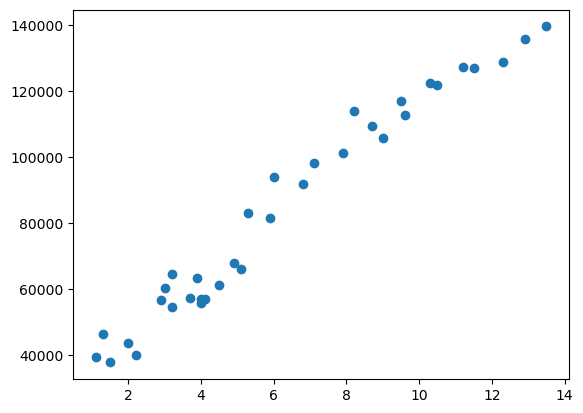

In [6]:
plt.scatter(x=df["YearsExperience"] , y= df["Salary"])
plt.show()

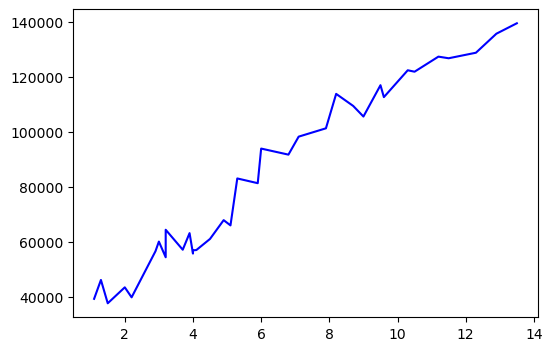

In [7]:
plt.figure(figsize=(6, 4))
plt.plot(df["YearsExperience"] , df["Salary"],linestyle="-", color="blue")
plt.show()

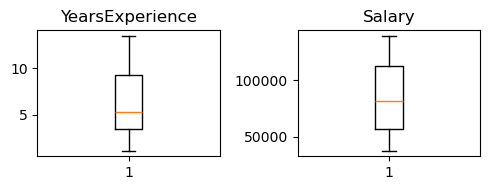

In [8]:
plt.figure(figsize=(5, 2))
for i, col in enumerate(df.columns, 1):
    plt.subplot(1, len(df.columns), i)  
    plt.boxplot(df[col])
    plt.title(col)  

plt.tight_layout()
plt.show()
    

<Axes: >

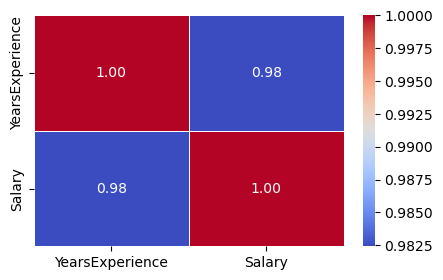

In [9]:
correlation = df.corr()
fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax)

In [10]:
X = df["YearsExperience"]
y = df["Salary"]
X=pd.DataFrame(X)
y=pd.DataFrame(y)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.2 , random_state=101 )

In [11]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [12]:
predict = model.predict(X_test)
predict

array([[ 80430.70927962],
       [ 56616.04598277],
       [ 88368.93037856],
       [147464.57633739],
       [127178.01130675],
       [112183.5936754 ],
       [107773.47084266]])

In [13]:
print(f"Mean absolute error = {mean_absolute_error(y_pred=predict , y_true=y_test)}")
print(f"Mean squared error = {mean_squared_error(y_pred=predict , y_true=y_test)}")

Mean absolute error = 3087.9783603557203
Mean squared error = 15522428.815406654


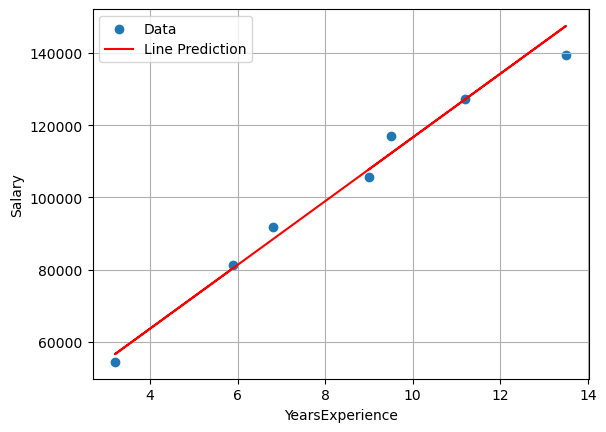

In [14]:
plt.scatter(x=X_test , y=y_test , label="Data")
plt.plot(X_test , predict , color="red" , label ="Line Prediction")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

MAE = 2197.24
MSE = 5904144.57
RMSE = 2429.84


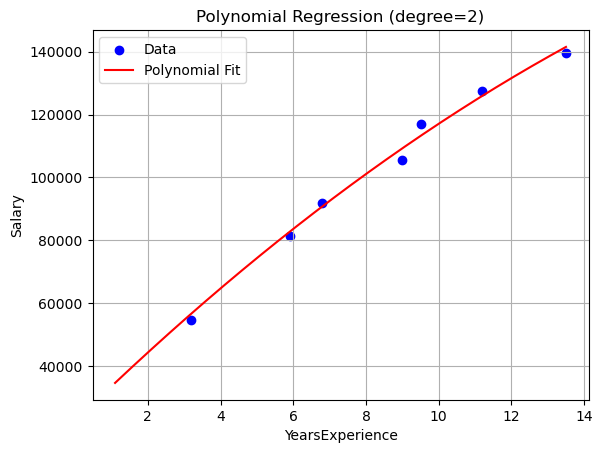

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


model = LinearRegression()
model.fit(X_train_poly, y_train)


y_pred = model.predict(X_test_poly)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"MAE = {mae:.2f}")
print(f"MSE = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")


x_curve = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
x_curve_poly = poly.transform(x_curve)
y_curve = model.predict(x_curve_poly)



plt.scatter(X_test, y_test, color='blue', label='Data')
plt.plot(x_curve, y_curve, color='red', label='Polynomial Fit')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Polynomial Regression (degree=2)")
plt.legend()
plt.grid(True)
plt.show()

#  checking Model : https://years-experience-and-salary-linear-regression-873a8tfvjkakh4zq.streamlit.app/